In [80]:
import sys
sys.path.append('..')
from hh_model import HH_model

In [81]:
import numpy as np
import matplotlib.pyplot as plt

In [82]:
M_ha = 2
M_hb = 5
V_2ha = -40
V_2hb = -35
s_ha = 6
s_hb = -10
X_h = [M_ha, M_hb, V_2ha, V_2hb, s_ha, s_hb]

param_bounds_wo_h = {'g_max': [100.0, 140.0],
                'E_rev': [-100, -80],

                'M_ma': [0, 50],
                'M_mb': [0, 50],
                'V_2ma': [-60, 60],
                #'V_2ma': [10, 100],
                'V_2mb': [-60, 60],
                's_ma': [-50, -0.5],  # excluding small abs values to avoid operating error in exp
                's_mb': [0.5, 50]}

input = {'p': 4,
         'q': 0,
        'step_Vs': np.array([0.00, 10.00, 20.00, 30.00, 40.00, 50.00, 60.00, 70.00, 80.00]), # mV
        'prestep_Vs': np.array([-80, -50, -20]),
        'step_V': 80,
        'prestep_V': -100,  #mV
        'end_time': 6,
        'time_step': 0.01,
        'X_h': X_h,
        'param_bounds_wo_h': param_bounds_wo_h}

In [83]:
# preset parameters associate with Potassium channel (only with m gate)
g_max = 120
E_rev = -60
M_ma = 25
M_mb = 30
V_2ma = 30
V_2mb = -15
s_ma = -20
s_mb = 15

X_m = [M_ma, M_mb, V_2ma, V_2mb, s_ma, s_mb]


t = np.arange(0.0, input['end_time'], input['time_step'])

In [84]:
model = HH_model(input['p'], input['q'], g_max, E_rev, X_m, X_h, input['prestep_V'], input['step_Vs'], input['prestep_Vs'], input['step_V'], t)

Text(0.5, 1.0, 'Activation Steady State Curve')

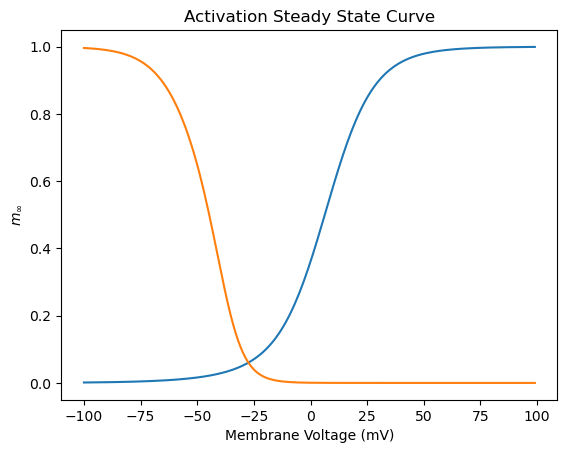

In [102]:
# get steady state curve/activation curve
m_infty_curve = np.array([model.find_steady_state(V, X_m) for V in range(-100, 100)])
h_infty_curve = np.array([model.find_steady_state(V, X_h) for V in range(-100, 100)])

plt.plot(range(-100, 100), m_infty_curve)
plt.plot(range(-100, 100), h_infty_curve)

plt.xlabel('Membrane Voltage (mV)')
plt.ylabel('$m_\infty$')
plt.title('Activation Steady State Curve')

In [86]:
# # try to find the maximum and minimum of m_infty, to see how to get V_2m with the hyperbolic tang. formalism
# from sympy import symbols, diff

# V, X_m = symbols('V X_m')
# expression = model.find_steady_state(V, X_m)

Text(0.5, 1.0, 'Activation Time Constant Curve')

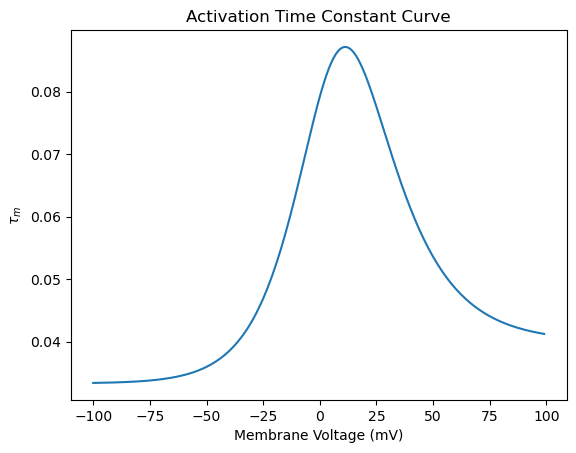

In [87]:
# get the time constant curve
time_constant_curve = np.array([model.find_time_constant(V, X_m) for V in range(-100, 100)])

plt.plot(range(-100, 100), time_constant_curve)

plt.xlabel('Membrane Voltage (mV)')
plt.ylabel('$\u03C4_m$')
plt.title('Activation Time Constant Curve')

Text(0.5, 1.0, 'Opening and Closing Rate Curves')

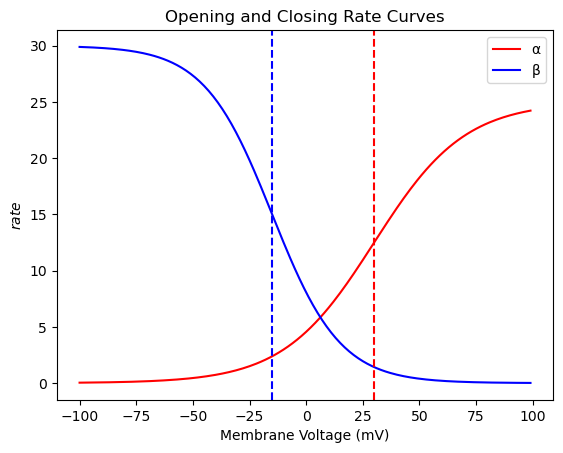

In [90]:
# get the opening and closing rate curves

rates = np.array([model.openclose_rates_fixedV(V, X_m) for V in range(-100, 100)]) 
# the rates here is an array of two elements tuples, the tuple[0] is the opening rate, tuple[1] is the closing rate

open_rate_curve = np.array([item[0] for item in rates])
close_rate_curve = np.array([item[1] for item in rates])

plt.plot(range(-100, 100), open_rate_curve, color='red', label = '\u03B1')
plt.plot(range(-100, 100), close_rate_curve, color='blue', label = '\u03B2')

plt.axvline(x=V_2ma, color='red', linestyle='--')
plt.axvline(x=V_2mb, color='blue', linestyle='--')

plt.xlabel('Membrane Voltage (mV)')
plt.ylabel('$rate$')
plt.legend()
plt.title('Opening and Closing Rate Curves')

In [95]:
# get ONE current trace
prestep_V = -100
V = 90

m = model.find_x_fixedV(model.openclose_rates_fixedV(V, X_m)[0], model.openclose_rates_fixedV(V, X_m)[1], model.find_steady_state(prestep_V, X_m))
h = model.find_x_fixedV(model.openclose_rates_fixedV(V, X_h)[0], model.openclose_rates_fixedV(V, X_h)[1], model.find_steady_state(prestep_V, X_h))
current_trace = model.find_I(V, m, h)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'current trace with prestep_V = -100, step_V = 90')

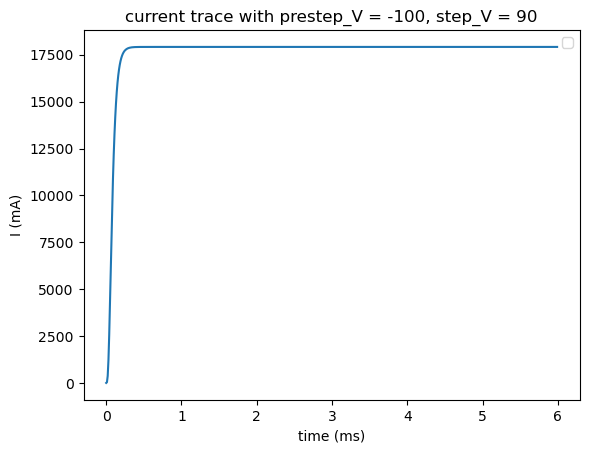

In [100]:
plt.plot(model.t, current_trace)

plt.xlabel('time (ms)')
plt.ylabel('I (mA)')
plt.legend()
plt.title(f'current trace with prestep_V = {prestep_V}, step_V = {V}')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'activation variable with prestep_V = -100, step_V = 90')

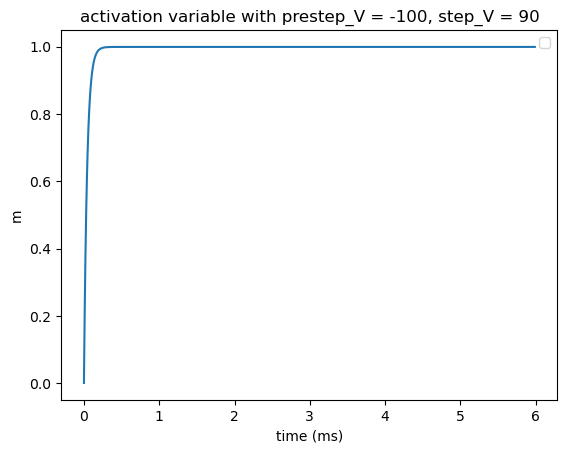

In [101]:
# m vs t

plt.plot(model.t, m)

plt.xlabel('time (ms)')
plt.ylabel('m')
plt.legend()
plt.title(f'activation variable with prestep_V = {prestep_V}, step_V = {V}')